In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
data_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
data['target']=data['sentiment'].apply(lambda x:1 if x=="negative" else 0)

data.head()

,review,sentiment,target
0,One of the other reviewers has mentioned that ...,positive,0
1,A wonderful little production. <br /><br />The...,positive,0
2,I thought this was a wonderful way to spend ti...,positive,0
3,Basically there's a family where a little boy ...,negative,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0


In [6]:

import re


# Function to preprocess text
def preprocess_text(paragraph):
    text = re.sub(r'\[[0-9]*\]', ' ', paragraph)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the function to all rows in the 'text' column
data['text'] = data['review'].apply(preprocess_text)

print(data.head())


                                              review sentiment  target  \
0  One of the other reviewers has mentioned that ...  positive       0   
1  A wonderful little production. <br /><br />The...  positive       0   
2  I thought this was a wonderful way to spend ti...  positive       0   
3  Basically there's a family where a little boy ...  negative       1   
4  Petter Mattei's "Love in the Time of Money" is...  positive       0   

                                                text  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production. <br /><br />the...  
2  i thought this was a wonderful way to spend ti...  
3  basically there's a family where a little boy ...  
4  petter mattei's "love in the time of money" is...  


In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)


In [8]:
data['preprocess_text']=data.text.apply(preprocess_text)

In [9]:
data.head()

,review,sentiment,target,text,preprocess_text
0,One of the other reviewers has mentioned that ...,positive,0,one of the other reviewers has mentioned that ...,reviewer mention watch oz episode hook right e...
1,A wonderful little production. <br /><br />The...,positive,0,a wonderful little production. <br /><br />the...,wonderful little production < br /><br />the f...
2,I thought this was a wonderful way to spend ti...,positive,0,i thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,1,basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0,"petter mattei's ""love in the time of money"" is...",petter mattei love time money visually stunnin...


In [10]:
X=data['preprocess_text']
y=data['target']

In [11]:
X[0]

'reviewer mention watch oz episode hook right exactly happen me.<br /><br />the thing strike oz brutality unflinche scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word.<br /><br />it call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy high agenda em city home aryan muslim gangsta latinos christians italian irish scuffle death stare dodgy dealing shady agreement far away.<br /><br />i main appeal fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess episode see strike nasty surreal ready watch develop taste oz get accustomed high level graphic violence violence injustice crooked guard sell nickel inmate kill order away mannered middle class inmate turn prison bitch lack street skill prison experience watch oz comfortable uncomfortable viewing that touch dark'

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
# Define the pipeline
NB = Pipeline([
    ('vect', TfidfVectorizer()),  
    ('clf', MultinomialNB())  
])


# Fit the pipeline on the training data
NB.fit(X_train, y_train)

y_pred=NB.predict(X_test)

print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4979
           1       0.85      0.87      0.86      5021

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer



pipeline = Pipeline([
    ('vect', TfidfVectorizer()),  
    ('clf', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      0.84      0.78      4979
           1       0.81      0.69      0.75      5021

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


pipeline = Pipeline([
    ('vect', TfidfVectorizer()),  
    ('clf', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      0.84      0.78      4979
           1       0.81      0.69      0.75      5021

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [16]:

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
RF = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())  
])



# Fit the pipeline on the training data
RF.fit(X_train, y_train)

y_pred=RF.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4979
           1       0.86      0.84      0.85      5021

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the pipeline
SVM = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SVC())  
])

# Fit the pipeline on the training data
SVM.fit(X_train, y_train)

# Predict on the test data
y_pred = SVM.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4979
           1       0.91      0.88      0.90      5021

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



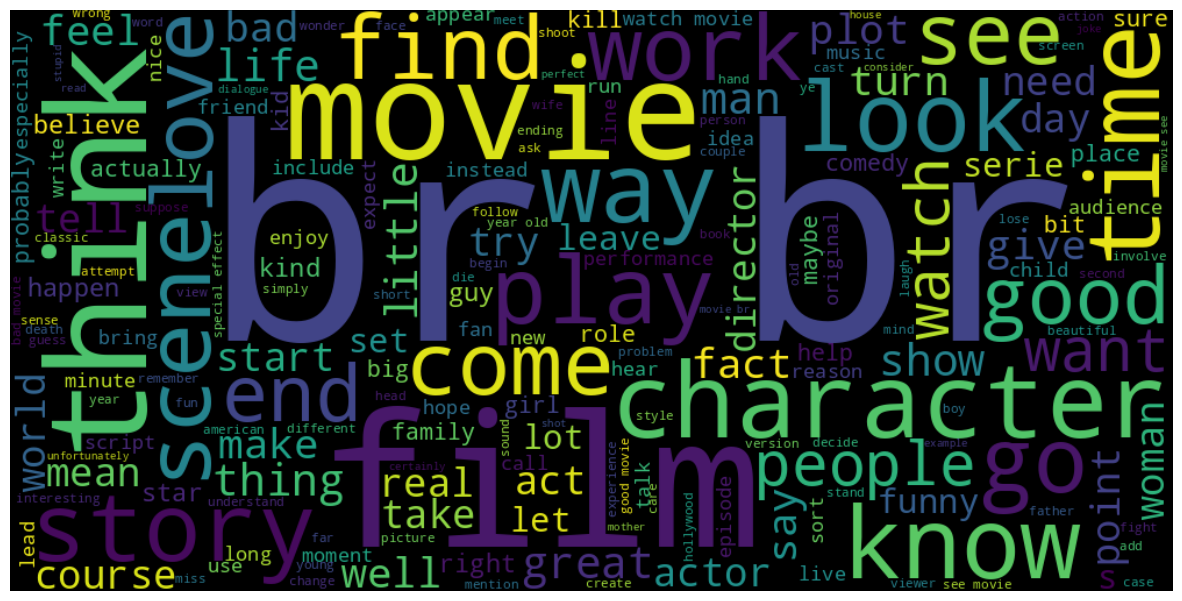

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame



# Concatenate all text entries in the 'text' column into a single string
text = data['preprocess_text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500).generate(text)

# Display the generated word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
